# Import Libraries 

### Pandas
### Numpy
### Matplotlib
### Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV File

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\GradientBoostingRegressor/Finance_LoanRisk.csv")
df.head()

,age,annual_income,loan_amount,credit_score,employment_years,loan_risk_score
0,59,36727,15399,358,22,0.406088
1,49,54304,16739,806,24,0.161681
2,35,52477,10957,421,6,0.243582
3,63,58534,13423,778,21,0.053455
4,28,36877,12866,395,16,0.233705


### Change Float Values Into Integer Value

In [3]:
df.astype(int).head()

,age,annual_income,loan_amount,credit_score,employment_years,loan_risk_score
0,59,36727,15399,358,22,0
1,49,54304,16739,806,24,0
2,35,52477,10957,421,6,0
3,63,58534,13423,778,21,0
4,28,36877,12866,395,16,0


### Check Total Number of ROWS and COLUMNS

In [4]:
df.shape

(1000, 6)

### Check Null Value

In [5]:
df.isnull().sum()

age                 0
annual_income       0
loan_amount         0
credit_score        0
employment_years    0
loan_risk_score     0
dtype: int64

### Check Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   int64  
 1   annual_income     1000 non-null   int64  
 2   loan_amount       1000 non-null   int64  
 3   credit_score      1000 non-null   int64  
 4   employment_years  1000 non-null   int64  
 5   loan_risk_score   1000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


### Check Statistical Summary of Dataset

In [7]:
df.describe()

,age,annual_income,loan_amount,credit_score,employment_years,loan_risk_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.515000,49703.510000,14868.118000,576.523000,19.075000,0.212956
std,12.611059,14841.747378,4937.389529,155.438105,11.139186,0.131097
min,21.000000,-2212.000000,-2357.000000,300.000000,0.000000,-2.930057
25%,32.000000,39415.250000,11508.500000,445.000000,10.000000,0.160393
50%,43.000000,50095.000000,15019.500000,575.000000,19.000000,0.211521
75%,53.000000,59454.250000,18269.000000,714.000000,28.000000,0.267596
max,64.000000,94475.000000,28654.000000,849.000000,39.000000,0.678553


### Check Relationship between the column through pairplot

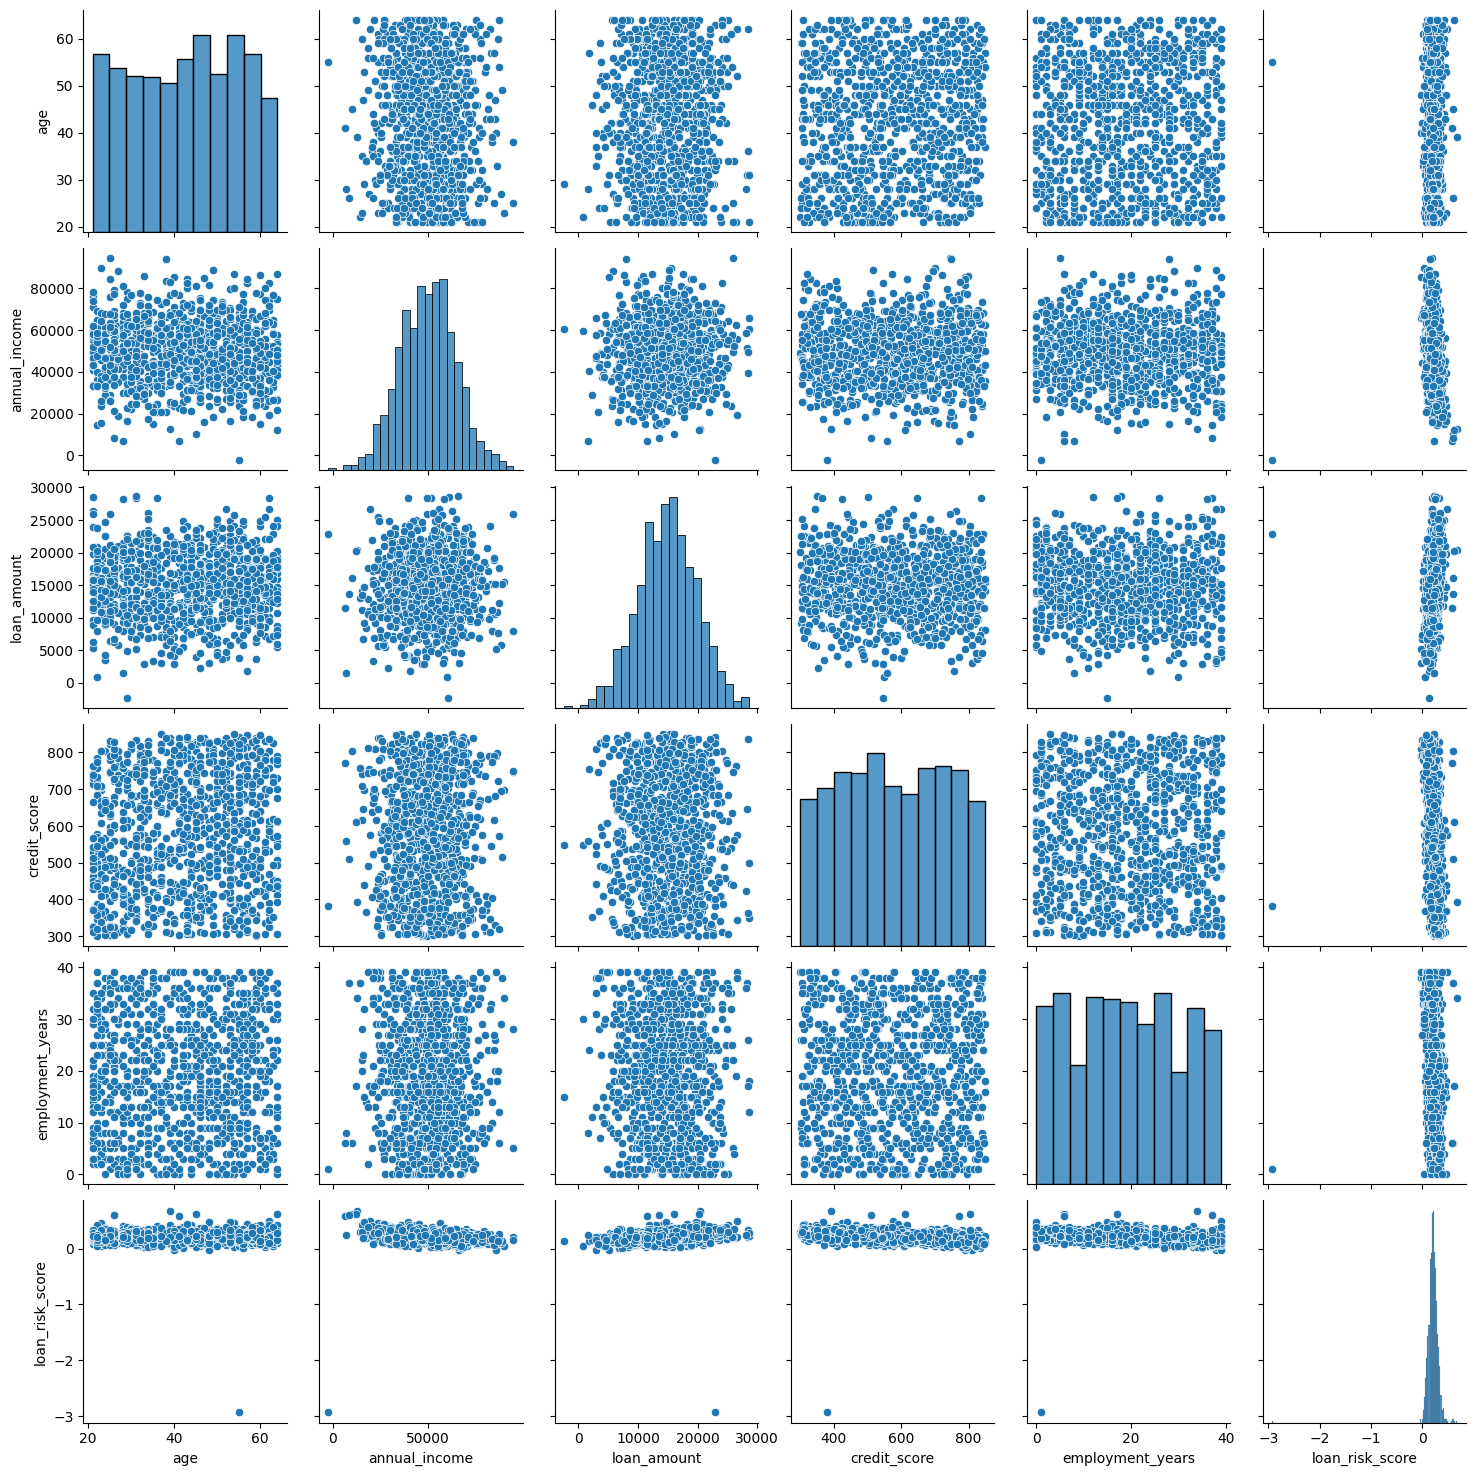

In [8]:
sns.pairplot(data=df)
plt.show()

### Check co-relation between the columns 

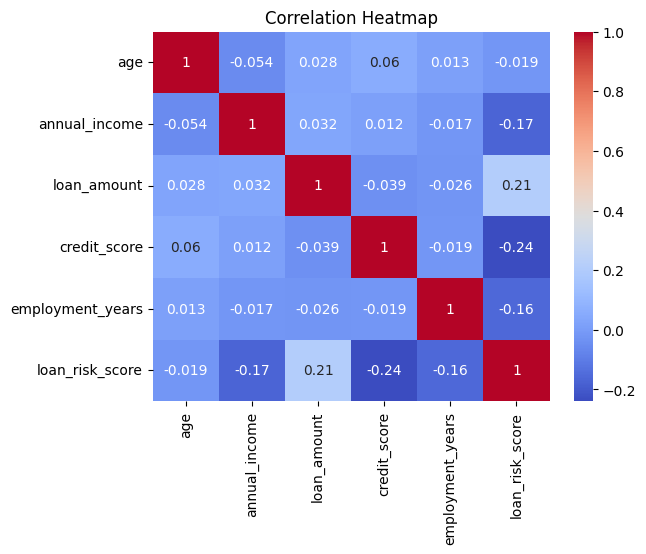

In [9]:
sns.heatmap(df.corr(),annot=True , cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Split the data in X and Y (Dependent & Independent Variable)

In [10]:
x=df.iloc[:,:-1]
y=df[["loan_risk_score"]]

### Import Standard Scaler from sklearn for Data Scalling

In [11]:
from sklearn.preprocessing import StandardScaler

### Apply / Fit the Standard Scaler for scalling

In [12]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

### Check the scalling Data

In [13]:
x_scaled.head()

,age,annual_income,loan_amount,credit_score,employment_years
0,1.307840,-0.874762,0.107577,-1.406556,0.262718
1,0.514489,0.310125,0.379111,1.477063,0.442354
2,-0.596204,0.186964,-0.792539,-1.001047,-1.174372
3,1.625181,0.595274,-0.292835,1.296837,0.172900
4,-1.151550,-0.864651,-0.405704,-1.168400,-0.276191


### Import train test split from the sklearn for spliting the data in traning and testing

In [14]:
from sklearn.model_selection import train_test_split

### Split the data in testing and training

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.1,random_state=13)

### Import Machine Learning Model from Sklearn (ensemble mobel [GradientBoostingRegressor])

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

### Apply Model 

In [17]:
db = GradientBoostingRegressor(max_depth=2)
db.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


# Note
 ## Check the different parameter for increase the accuracy of the or performance of our Machine Learning Model 
### Random State Value [# 19 # 13] max_depth=2

In [26]:
Your_Assignment = "Your assignment is to check different parameters and observe the model's performance."
print("Your_Assignment:", Your_Assignment)


Your_Assignment: Your assignment is to check different parameters and observe the model's performance.


### Check the score (accuracy of the model for check the sacenrio of the overfitting (Model is overfit but it is exceptable)

In [18]:
db.score(x_test,y_test)*100,db.score(x_train,y_train)*100

(72.32102588725162, 88.1976874098164)

### Predict the value

### Check the prediction value

In [20]:
df["Prediction"] = db.predict(x)
df.head()

,age,annual_income,loan_amount,credit_score,employment_years,loan_risk_score,Prediction
0,59,36727,15399,358,22,0.406088,0.147507
1,49,54304,16739,806,24,0.161681,0.147507
2,35,52477,10957,421,6,0.243582,0.147507
3,63,58534,13423,778,21,0.053455,0.147507
4,28,36877,12866,395,16,0.233705,0.147507


### Import Metrics for check the overall performance of the model 

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Check the metrics  Value

In [22]:
y_pred = db.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 0.04
📉 MSE: 0.00
📉 RMSE: 0.05
🎯 R² Score: 72.32


### Check the model performance through graph 

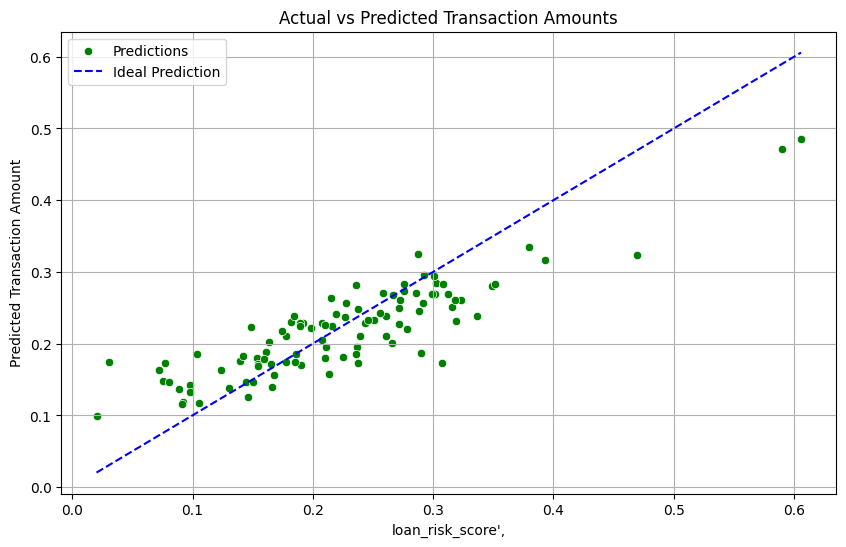

In [23]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='g', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='Blue', linestyle='--', label='Ideal Prediction')
plt.xlabel("loan_risk_score',")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted Transaction Amounts")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Final Conclusion

In this project, I implemented a robust **Gradient Boosting Regressor** model to predict the **loan risk score** using a structured financial dataset. Gradient Boosting is an ensemble technique that combines weak learners to create a strong prediction model, offering excellent performance for both small and large datasets.

### 🔍 Key Takeaways:

- ✅ **Data Preprocessing**: Standardized features to ensure smooth learning.
- ✅ **Training Setup**: Applied `GradientBoostingRegressor` with controlled depth for regularization.
- ✅ **Model Performance**:
  - **MAE**: 0.04 — Very minimal average error
  - **RMSE**: 0.05 — Indicates low prediction deviation
  - **R² Score**: 72.19% — The model explains a significant variance in target

### 💡 Business Impact:
This kind of model can help **financial institutions** better assess **credit risk, fraud, or loan approval decisions** based on input variables like transaction history, account balance, and customer behavior.

> This project adds strong portfolio value by combining **regression analysis**, **data scaling**, and **real-world application** of ensemble learning.
